In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from scipy.ndimage.filters import gaussian_filter
from scipy.optimize import curve_fit

In [3]:
figsize(10, 8)

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [6]:
def get_map(bank='A', session='5'):
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamapsyy_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['meansub'][tmask]
    
    if bank == 'A':
        cfreq = 4.575
    elif bank == 'B':
        cfreq = 5.625
    elif bank == 'C':
        cfreq = 6.125
    elif bank == 'D':
        cfreq = 7.175
    beam = 12.6 / cfreq
    
    nrabins = int(( ras.max() - ras.min() ) / (1. / 60.))
    ndecbins = int(( decs.max() - decs.min() ) / (1. / 60.))
    
    datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, nrabins, ndecbins)
    mask = hits == 0
    signal = np.zeros_like(datamap)
    signal[~mask] = datamap[~mask] / hits[~mask]
    
    smoothed = gaussian_filter(signal, beam)
    shits = gaussian_filter(hits, beam)
    maskz = shits < 1.
    smoothed[maskz] = np.nan
    
    figure()
    pc = pcolormesh(rabins, decbins, smoothed)
    clim(-0.1, 0.1)
    cb = colorbar()
    xlabel('RA [degrees]')
    ylabel('DEC [degrees]')
    cb.set_label('Flux [Jy]')
    return rabins, decbins, smoothed, shits

/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


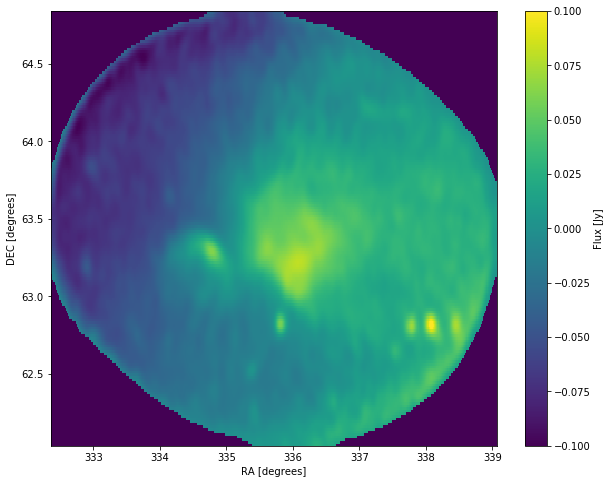

In [7]:
rabins, decbins, smoothedA, hitsA = get_map('A', '5')

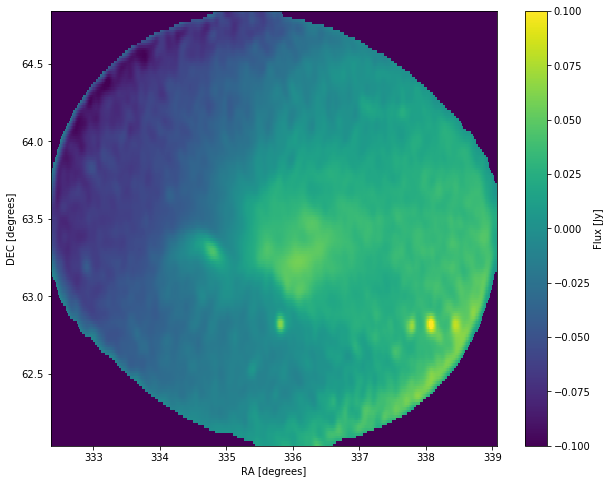

In [8]:
rabins, decbins, smoothedB, hitsB = get_map('B', '5')

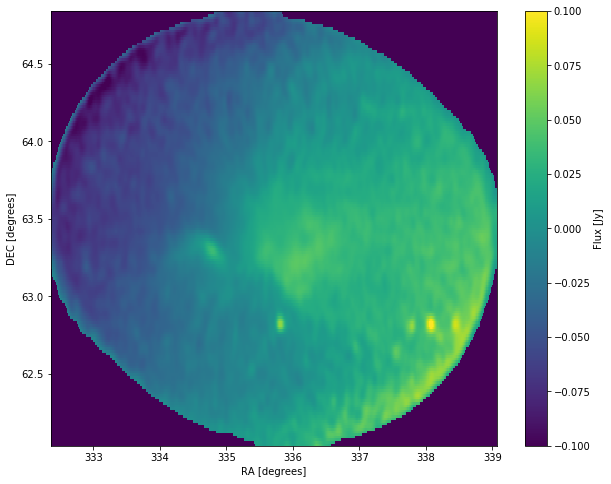

In [9]:
rabins, decbins, smoothedC, hitsC = get_map('C', '5')

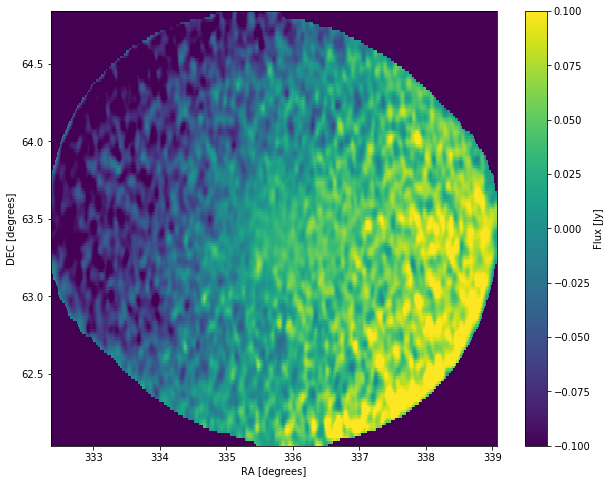

In [10]:
rabins, decbins, smoothedD, hitsD = get_map('D', '5')

In [11]:
N = size(smoothedA)

In [12]:
sigA = smoothedA.reshape(N, -1)
sigB = smoothedB.reshape(N, -1)
sigC = smoothedC.reshape(N, -1)

In [13]:
def line(x, m, b):
    return m * x + b

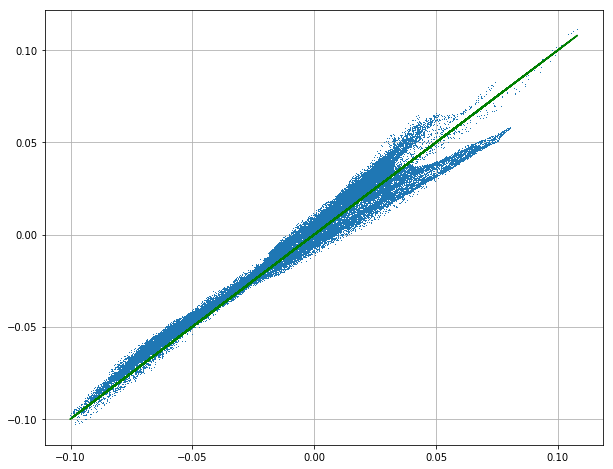

In [14]:
plot(sigA, sigB, ',')
plot(sigA, line(sigA, 1., 0), 'g')
grid()

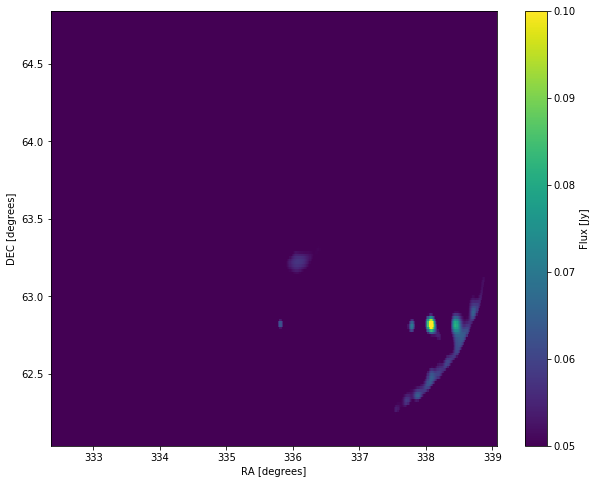

In [59]:
figure()
pc = pcolormesh(rabins, decbins, smoothedB)
clim(0.05, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

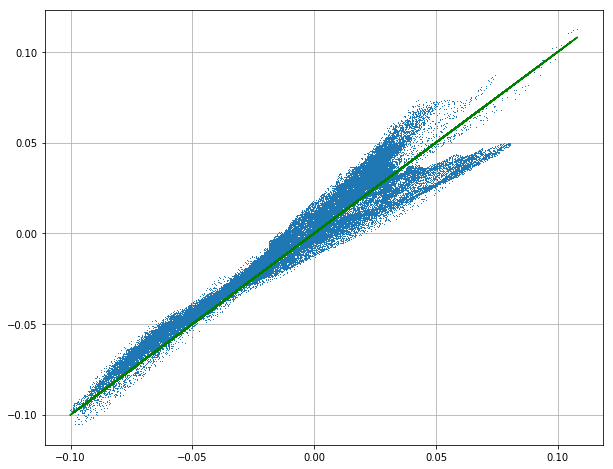

In [15]:
plot(sigA, sigC, ',')
plot(sigA, line(sigA, 1., 0), 'g')
grid()

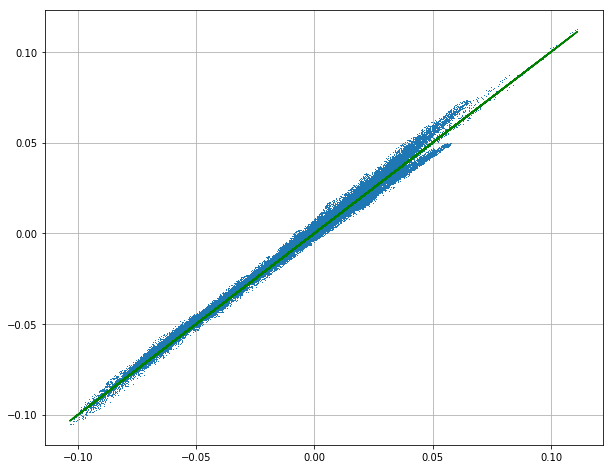

In [16]:
plot(sigB, sigC, ',')
plot(sigB, line(sigB, 1., 0), 'g')
grid()

In [17]:
maskA = ~np.isnan(sigA)
maskB = ~np.isnan(sigB)
mask = maskA * maskB
popt = curve_fit(line, sigA[mask], sigB[mask])
popt[0]

array([  9.36205559e-01,   9.07727100e-04])

In [18]:
maskA = ~np.isnan(sigA)
maskC = ~np.isnan(sigC)
mask = maskA * maskC
popt = curve_fit(line, sigA[mask], sigC[mask])
popt[0]

array([ 0.93073535,  0.00214522])

In [19]:
maskB = ~np.isnan(sigB)
maskC = ~np.isnan(sigC)
mask = maskB * maskC
popt = curve_fit(line, sigB[mask], sigC[mask])
popt[0]

array([ 1.00443331,  0.00133044])

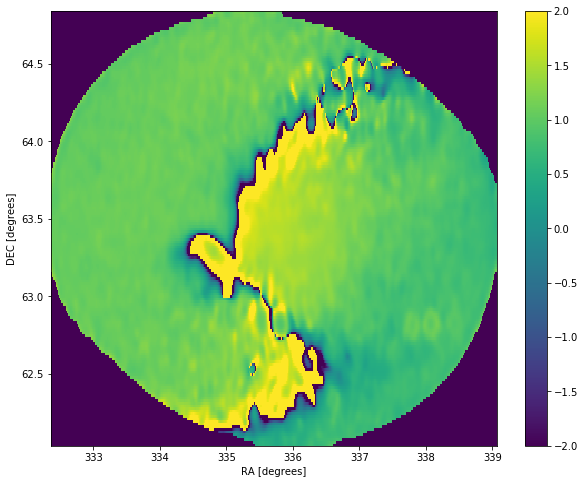

In [39]:
figure()
maskA = ~np.isnan(smoothedA)
maskB = ~np.isnan(smoothedB)
mask = maskA * maskB
ratioAB = smoothedA / smoothedB
ratioAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, ratioAB)
clim(-2, 2)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

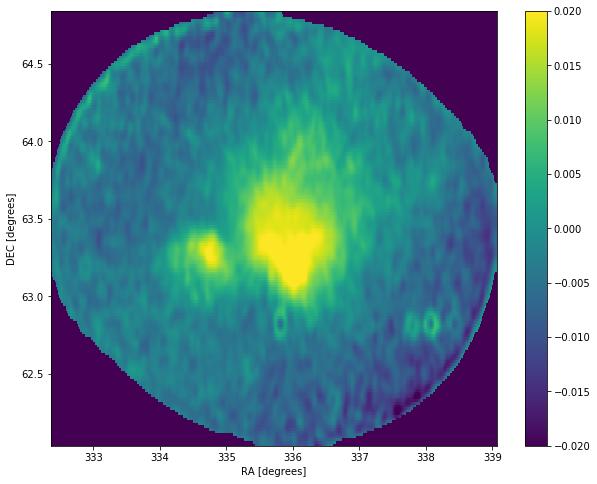

In [55]:
figure()
maskA = ~np.isnan(smoothedA)
maskB = ~np.isnan(smoothedB)
mask = maskA * maskB
subAB = smoothedA - smoothedB
subAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, subAB)
clim(-0.02, 0.02)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

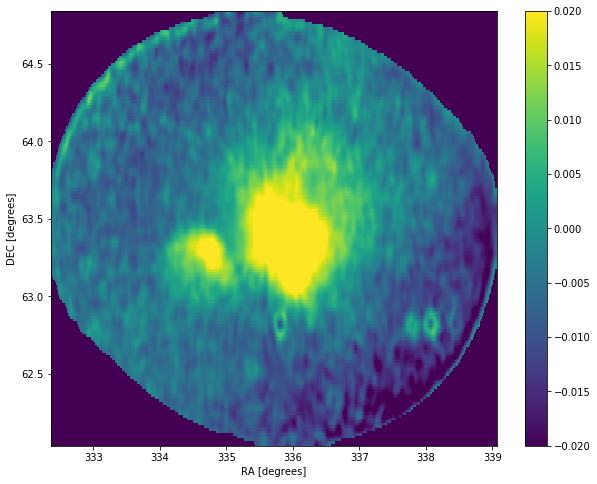

In [56]:
figure()
maskA = ~np.isnan(smoothedA)
maskC = ~np.isnan(smoothedC)
mask = maskA * maskC
subAC = smoothedA - smoothedC
subAC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, subAC)
clim(-0.02, 0.02)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

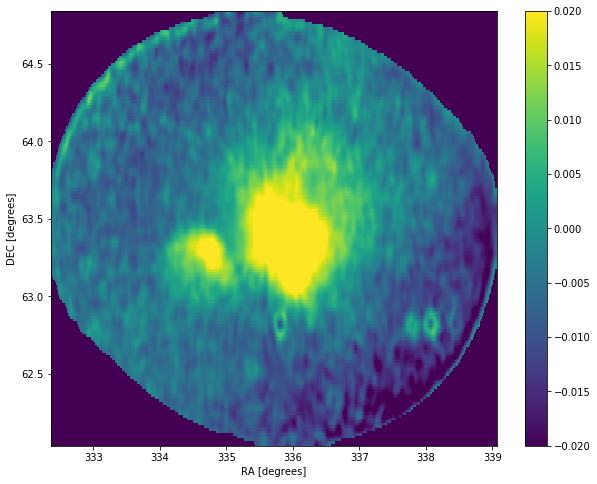

In [56]:
figure()
maskA = ~np.isnan(smoothedA)
maskC = ~np.isnan(smoothedC)
mask = maskA * maskC
subAC = smoothedA - smoothedC
subAC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, subAC)
clim(-0.02, 0.02)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

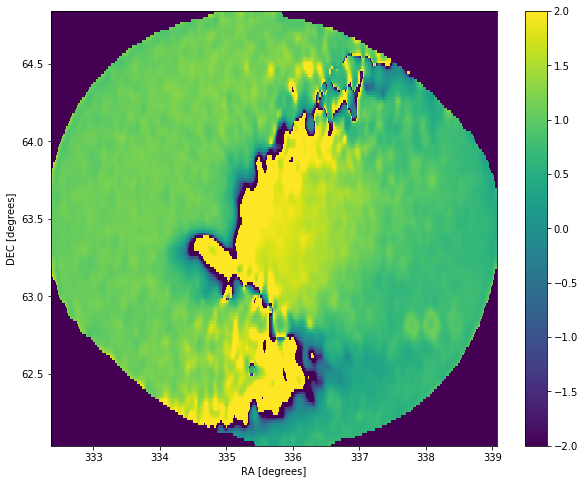

In [38]:
figure()
maskA = ~np.isnan(smoothedA)
maskC = ~np.isnan(smoothedC)
mask = maskA * maskC
ratioAC = smoothedA / smoothedC
ratioAC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, ratioAC)
clim(-2, 2)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

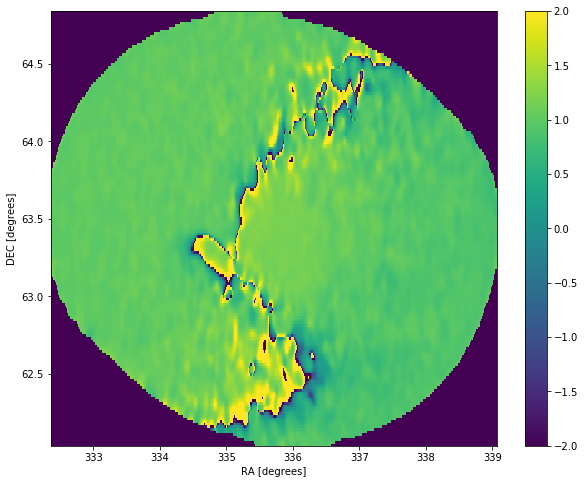

In [37]:
figure()
maskB = ~np.isnan(smoothedB)
maskC = ~np.isnan(smoothedC)
mask = maskB * maskC
ratioBC = smoothedB / smoothedC
ratioBC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, ratioBC)
clim(-2, 2)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


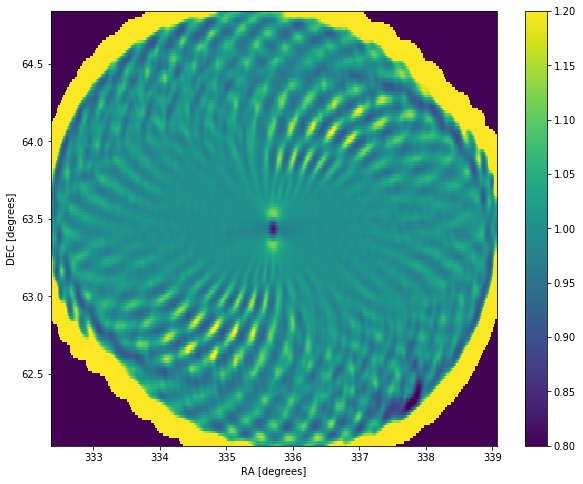

In [34]:
figure()
maskA = ~(hitsA == 0)
maskB = ~(hitsB == 0)
mask = maskA * maskB
hitratioAB = hitsA / hitsB
hitratioAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, hitratioAB)
clim(0.8, 1.2)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

In [236]:
def calculate_sflux(bank='A', session='5', doplot=True, sbeam = 1.):
    rc = 335.7
    dc = 63.4
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['calibrated'][tmask]
    
    beam1arcmin = ( (sbeam/60.) * (np.pi / 180.) )**2
    if bank == 'A':
        cfreq = 4.575
    elif bank == 'B':
        cfreq = 5.625
    elif bank == 'C':
        cfreq = 6.125
    elif bank == 'D':
        cfreq = 7.175
    beam = 12.6 / cfreq
    actualbeam = ( (beam /60.) * (np.pi / 180.) )**2
    
    nrapix = int((ras.max() - ras.min()) / (sbeam / 60.))
    ndecpix = int((decs.max() - decs.min()) / (sbeam / 60.))
    
    datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, nrapix, ndecpix) 
    mask = hits == 0
    signal = np.zeros_like(datamap)
    signal[~mask] = datamap[~mask] / hits[~mask]
    
    signal = gaussian_filter(signal, beam/sbeam)
    shits = gaussian_filter(hits, beam/sbeam)
    maskz = shits == 0.
    signal[maskz] = np.nan
    
    radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
    
    rmask = radius <= 1.
    insidedata = np.zeros_like(calibrated)
    insidedata[rmask] = 10.
    innermap, innerhits, rabins, decbins = naive_map(insidedata, ras, decs, nrapix, ndecpix) 
    innerregion = innermap > 0
    
    annulus = (radius >= 80./60.) & (radius <= 2.)
    outerdata = np.zeros_like(calibrated)
    outerdata[annulus] = 10.
    outermap, outerhits, rabins, decbins = naive_map(outerdata, ras, decs, nrapix, ndecpix)
    outerregion = outermap > 0
    
    if doplot:
        figure()
        pc = pcolormesh(rabins, decbins, signal)
        clim(-0.1, 0.1)
        cb = colorbar()
        xlabel('RA [degrees]')
        ylabel('DEC [degrees]')
        cb.set_label('Flux [Jy]')
    
    flux = np.nansum(signal[innerregion] - np.nanmedian(signal[outerregion]))
    return flux,  beam1arcmin / actualbeam

In [7]:
freqs = [4.575, 5.625, 6.125, 7.175]
banks = ['A', 'B', 'C', 'D']

In [199]:
def calculate_flux(bank='A', session='5', doplot=True, sbeam = 1.):
    rc = 335.7
    dc = 63.4
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['calibrated'][tmask]
    
    beam1arcmin = ( (sbeam/60.) * (np.pi / 180.) )**2
    if bank == 'A':
        cfreq = 4.575
    elif bank == 'B':
        cfreq = 5.625
    elif bank == 'C':
        cfreq = 6.125
    elif bank == 'D':
        cfreq = 7.175
    beam = 12.6 / cfreq
    actualbeam = ( (beam /60.) * (np.pi / 180.) )**2
    
    radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
    rmask = radius < 1.
    nrapix = int((ras[rmask].max() - ras[rmask].min()) / (sbeam / 60.))
    ndecpix = int((decs[rmask].max() - decs[rmask].min()) / (sbeam / 60.))
    
    datamap, hits, rabins, decbins = naive_map(calibrated[rmask], ras[rmask], decs[rmask], nrapix, ndecpix) 
    mask = hits == 0
    signal = np.zeros_like(datamap)
    signal[~mask] = datamap[~mask] / hits[~mask]
    signal[mask] = np.nan
    
    if doplot:
        figure()
        pc = pcolormesh(rabins, decbins, signal)
        clim(-0.1, 0.1)
        cb = colorbar()
        xlabel('RA [degrees]')
        ylabel('DEC [degrees]')
        cb.set_label('Flux [Jy]')
    
    annulus = (radius > 80./60.) & (radius < 2.)
    nrapix = int((ras[annulus].max() - ras[annulus].min()) / (sbeam / 60.))
    ndecpix = int((decs[annulus].max() - decs[annulus].min()) / (sbeam / 60.))
    
    datamap, hits, rabins, decbins = naive_map(calibrated[annulus], ras[annulus], decs[annulus], nrapix, ndecpix)
    mask = hits == 0
    nullmap = np.zeros_like(datamap)
    nullmap[~mask] = datamap[~mask] / hits[~mask]
    nullmap[mask] = np.nan
    
    if doplot:
        figure()
        pc = pcolormesh(rabins, decbins, nullmap)
        clim(-0.1, 0.1)
        cb = colorbar()
        xlabel('RA [degrees]')
        ylabel('DEC [degrees]')
        cb.set_label('Flux [Jy]')
    
    flux = np.nansum(signal - np.nanmedian(nullmap))
    return flux,  beam1arcmin / actualbeam

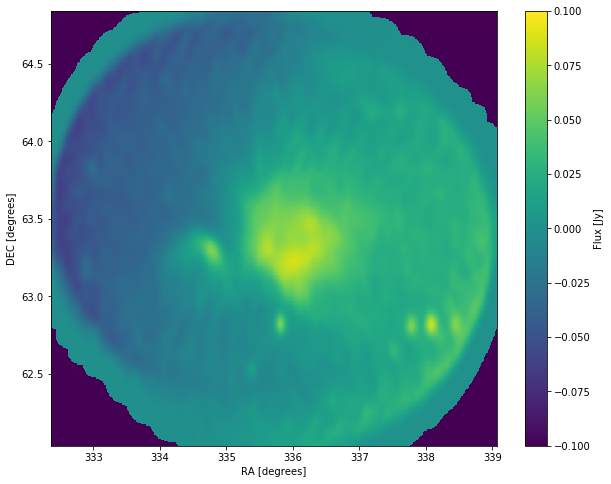

In [237]:
sfs, corrs = calculate_sflux('A', '5', doplot=True, sbeam=0.5)

In [238]:
sbeams = np.linspace(0.1, 3., 20)

In [239]:
sfluxs = []
corrections = []
for sbeam in sbeams:
    sfs, corrs = calculate_sflux('A', '5', doplot=False, sbeam=sbeam)
    sfluxs.append(sfs)
    corrections.append(corrs)
sfluxs = np.array(sfluxs)
corrections = np.array(corrections)

In [240]:
sfluxs3 = []
corrections3 = []
for sbeam in sbeams:
    sfs, corrs = calculate_sflux('C', '5', doplot=False, sbeam=sbeam)
    sfluxs3.append(sfs)
    corrections3.append(corrs)
sfluxs3 = np.array(sfluxs3)
corrections3 = np.array(corrections3)

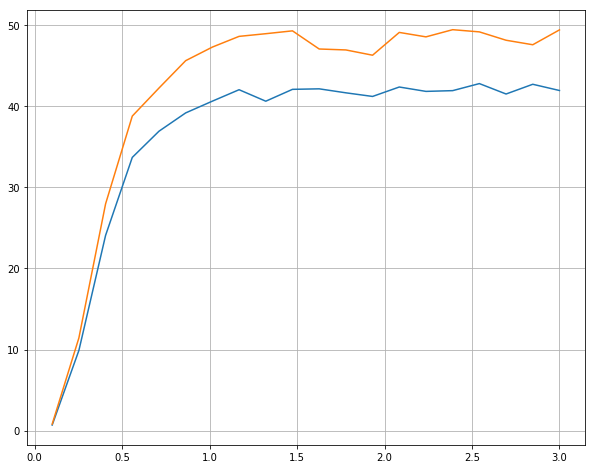

In [241]:
plot(sbeams, sfluxs * corrections)
plot(sbeams, sfluxs3 * corrections3)
grid()

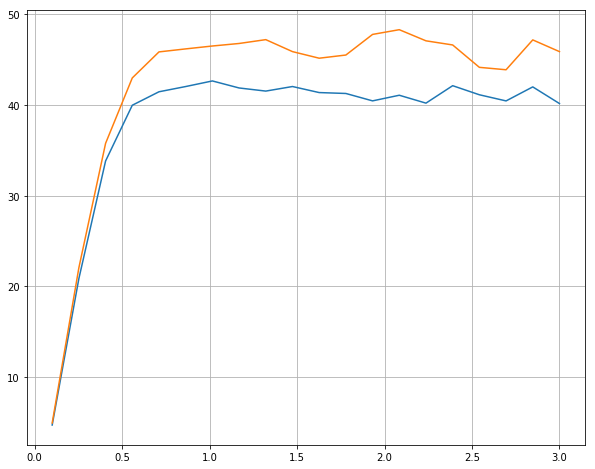

In [198]:
plot(sbeams, sfluxs * corrections)
plot(sbeams, sfluxs3 * corrections3)
grid()

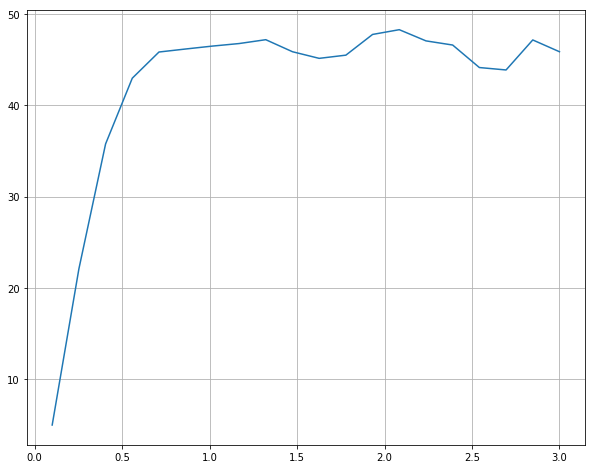

In [197]:
plot(sbeams, sfluxs3 * corrections3)
grid()

In [176]:
sfluxs2 = []
afluxs2 = []
for sbeam in sbeams:
    sfluxs2.append(calculate_flux('B', '5', doplot=False, sbeam=sbeam))
    afluxs2.append(calculate_sflux('B', '5', doplot=False, sbeam=sbeam))

In [177]:
sfluxs3 = []
afluxs3 = []
for sbeam in sbeams:
    sfluxs3.append(calculate_flux('C', '5', doplot=False, sbeam=sbeam))
    afluxs3.append(calculate_sflux('C', '5', doplot=False, sbeam=sbeam))

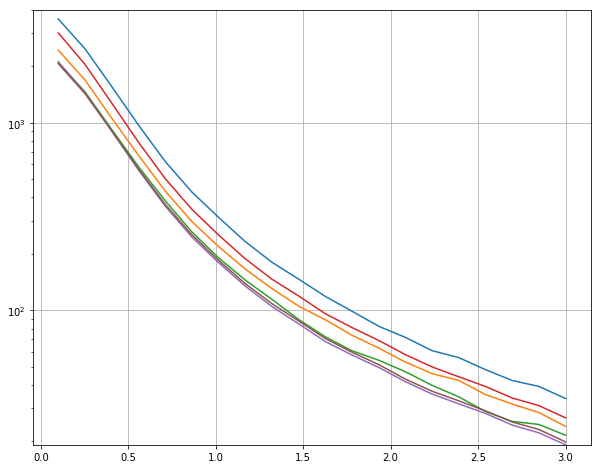

In [134]:
plot(sbeams, sfluxs)
plot(sbeams, sfluxs2)
plot(sbeams, sfluxs3)
plot(sbeams, afluxs)
plot(sbeams, afluxs2)
plot(sbeams, afluxs3)
#plot(sbeams, 200./sbeams**2)
yscale('log')
#xscale('log')
ylim(0, 4000)
grid()

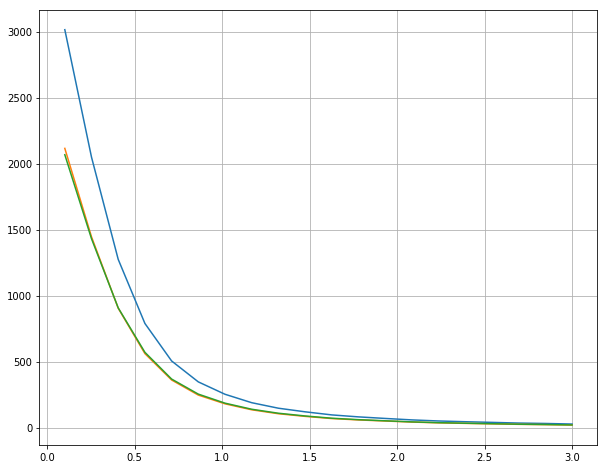

In [181]:
plot(sbeams, sfluxs)
plot(sbeams, sfluxs2)
plot(sbeams, sfluxs3)
#ylim(0, 4000)
grid()

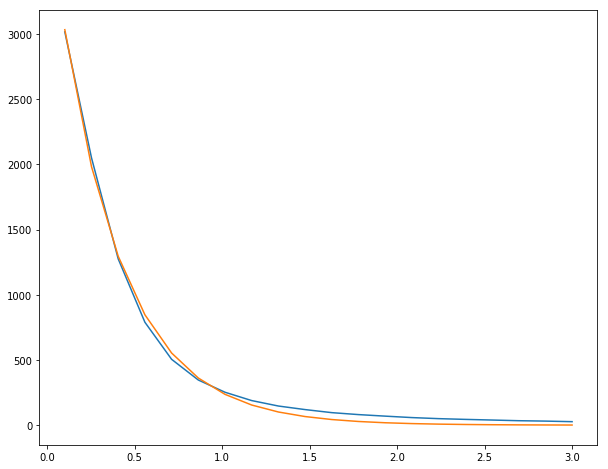

In [187]:
plot(sbeams, sfluxs)
plot(sbeams, gauss(sbeams, *popt[0]))

In [186]:
def gauss(x, A, sigma, a):
    return A * np.exp( - (x + a) / sigma)

In [184]:
popt = curve_fit(gauss, sbeams, sfluxs)

In [185]:
popt[0]

array([  4.19438556e-12,   3.58801144e-01,  -1.23761120e+01])

In [137]:
(np.array(sfluxs) - np.array(afluxs)) / sfluxs

array([ 0.15773199,  0.17393448,  0.18417459,  0.19022632,  0.18965789,
        0.19126695,  0.19522503,  0.190213  ,  0.18773943,  0.18701641,
        0.19161289,  0.18160428,  0.1597086 ,  0.19067078,  0.18097318,
        0.21001419,  0.1867354 ,  0.19299026,  0.20990183,  0.21112288])

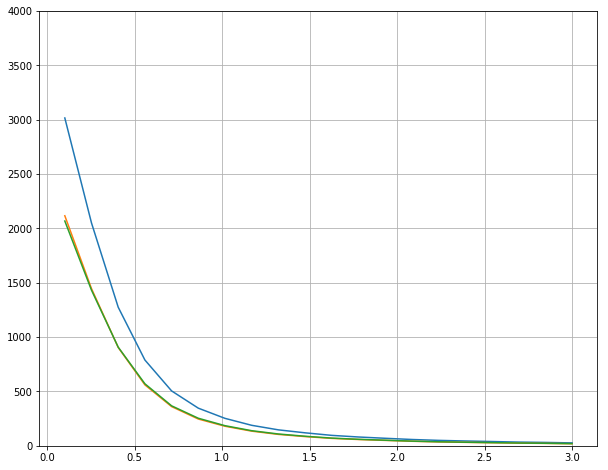

In [131]:
plot(sbeams, afluxs)
plot(sbeams, afluxs2)
plot(sbeams, afluxs3)
#plot(sbeams, 200./sbeams**2)
ylim(0, 4000)
grid()